In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [5]:
## Ques 1
claims_data=pd.read_csv("claims.csv")
cust_demographics=pd.read_csv("cust_demographics.csv")
print(claims_data.head())
print(cust_demographics.head())

   claim_id  customer_id      incident_cause  claim_date claim_area  \
0  54004764     21868593        Driver error  11/27/2017       Auto   
1  33985796     75740424               Crime  10/03/2018       Home   
2  53522022     30308357  Other driver error  02/02/2018       Auto   
3  13015401     47830476      Natural causes  06/17/2018       Auto   
4  22890252     19269962               Crime  01/13/2018       Auto   

  police_report     claim_type claim_amount  total_policy_claims fraudulent  
0            No  Material only        $2980                  1.0         No  
1       Unknown  Material only        $2980                  3.0         No  
2            No  Material only      $3369.5                  1.0        Yes  
3            No  Material only        $1680                  1.0         No  
4            No  Material only        $2680                  1.0         No  
    CUST_ID  gender DateOfBirth State       Contact   Segment
0  21868593  Female   12-Jan-79    VT  789-

In [6]:
comb_data=pd.merge(claims_data,cust_demographics,how='inner',left_on='customer_id',right_on='CUST_ID')
comb_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [7]:
## Ques 2
comb_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [8]:
##Ques 3
comb_data['claim_date']=pd.to_datetime(comb_data['claim_date'],format='%m/%d/%Y')
comb_data['claim_amount']=comb_data['claim_amount'].str.replace('$', '')
comb_data['claim_amount']=comb_data['claim_amount'].apply(lambda x:float(x))
comb_data['DateOfBirth']=pd.to_datetime(comb_data['DateOfBirth'],format='%d-%b-%y')
def fun(x):
    if x.year > pd.Timestamp.now().year:
        return x+pd.DateOffset(years=-100)
    else:
        return x
comb_data['DateOfBirth']=comb_data['DateOfBirth'].apply(fun)
comb_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver


In [9]:
###  Ques 4
comb_data['Alert']=comb_data['police_report']=='yes'
comb_data['Alert']=comb_data['Alert'].apply(lambda x:int(x))
comb_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0


In [10]:
## Ques 5
comb_data.drop_duplicates(['customer_id'],inplace=True)
comb_data.reset_index(drop=True,inplace=True)
comb_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1074,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1075,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1076,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


In [11]:
## Ques 6
print(comb_data.isna().sum())
comb_data['claim_amount'].fillna(comb_data['claim_amount'].mean(),inplace=True)
comb_data['total_policy_claims'].fillna(comb_data['total_policy_claims'].mean,inplace=True)

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Alert                   0
dtype: int64


In [12]:
## Ques 7
comb_data['Age']=pd.Timestamp.now().year-(comb_data['DateOfBirth'].apply(lambda x:x.year))

In [13]:
## Ques 7
def fun(x):
    if x<18:
        return 'Children'
    elif x>=18 and x<30:
        return 'Youth'
    elif x>=30 and x<60:
        return 'Adult'
    elif x>60:
        return 'Senior'
comb_data['Category']=comb_data['Age'].apply(fun)
comb_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert,Age,Category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,41,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0,50,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,36,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0,34,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,43,Adult


In [14]:
## Ques 8
comb_data.groupby(['Segment'])['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12756.479697
1,Platinum,12369.304648
2,Silver,12269.434851


In [15]:
## QUes 9
Date='01/10/2018'
d=pd.to_datetime(Date,format='%d/%m/%Y')-pd.DateOffset(days=20)
df9=comb_data[comb_data.claim_date<=d].groupby(['incident_cause'])['claim_amount'].sum().reset_index()
print(df9)

       incident_cause  claim_amount
0               Crime  7.244625e+05
1        Driver error  3.264286e+06
2      Natural causes  1.312706e+06
3        Other causes  3.725038e+06
4  Other driver error  3.318806e+06


In [16]:
## Ques 10
ls=['TX','DE','AK']
l=['Driver error','Other driver error']

df10=comb_data[(comb_data.Category=='Adult') & (comb_data.State.isin(ls)) & (comb_data.incident_cause.isin(l))].reset_index(drop=True)

df10

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert,Age,Category
0,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1,No,2632562,Female,1985-12-14,AK,498-597-9658,Platinum,0,35,Adult
1,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12470.498519,1,No,92752865,Male,1986-01-30,AK,143-219-5498,Silver,0,34,Adult
2,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1,No,61810954,Male,1969-05-18,TX,724-493-6179,Silver,0,51,Adult
3,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4,No,3159546,Male,1987-10-20,TX,586-129-9752,Platinum,0,33,Adult
4,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1,No,68772500,Male,1989-11-10,TX,562-259-5432,Silver,0,31,Adult
5,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12470.498519,1,Yes,154557,Female,1978-05-23,DE,962-879-1238,Platinum,0,42,Adult
6,46572741,82415154,Other driver error,2017-06-11,Auto,No,Material and injury,15240.000000,1,No,82415154,Female,1980-03-08,DE,578-942-1542,Platinum,0,40,Adult
7,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2,No,684748,Male,1977-08-03,AK,613-385-2863,Gold,0,43,Adult
8,31574986,11321295,Driver error,2017-02-03,Auto,No,Material only,2460.000000,2,No,11321295,Male,1965-11-13,DE,429-596-2169,Platinum,0,55,Adult
9,34621474,54094880,Other driver error,2017-02-17,Auto,No,Material only,1529.500000,1,Yes,54094880,Male,1984-06-01,DE,568-481-7418,Silver,0,36,Adult


AxesSubplot(0.260833,0.125;0.503333x0.755)


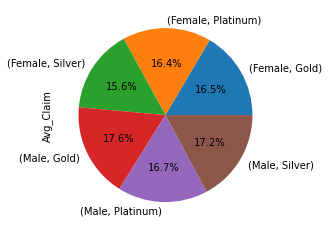

In [17]:
##Quues 11
df11 = comb_data.groupby(['gender','Segment']).agg(Avg_Claim = ('claim_amount', 'mean'))
print(df11['Avg_Claim'].plot.pie(autopct='%1.1f%%'))

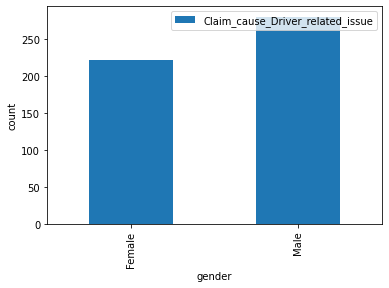

In [18]:
## Ques 12
l=['Driver error','Other driver error']
df12=comb_data[(comb_data.incident_cause.isin(l))].reset_index(drop=True)
df12=df12.groupby(['gender']).agg(Claim_cause_Driver_related_issue=('incident_cause','count'))
df12.plot(kind='bar')
plt.ylabel('count')
plt.show()

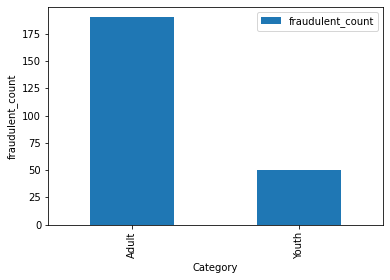

In [19]:
## Ques 13
df13=comb_data[comb_data.fraudulent=='Yes']
df13=df13.groupby(['Category']).agg(fraudulent_count=('fraudulent','count'))
df13.plot(kind='bar')
plt.ylabel('fraudulent_count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

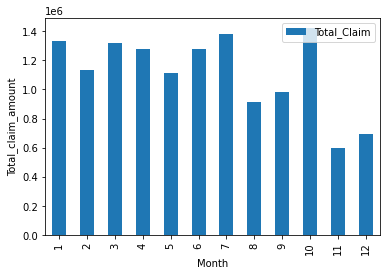

In [20]:
## Ques 14
comb_data['Month']=comb_data['claim_date'].apply(lambda x:x.month)
df14=comb_data.groupby(['Month']).agg(Total_Claim = ('claim_amount', 'sum'))
df14.plot(kind='bar')
plt.ylabel('Total_claim_amount')
plt.show

  Category fraudulent  Avg_claim_amount
0    Adult         No      12200.374094
1    Adult        Yes      13986.136756
2    Youth         No      12599.195991
3    Youth        Yes      10138.939822
   gender fraudulent  Avg_claim_amount
0  Female         No      12425.609656
1  Female        Yes      11072.666549
2    Male         No      12193.568505
3    Male        Yes      15058.987518


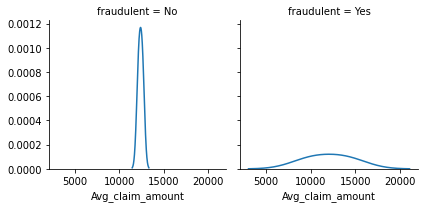

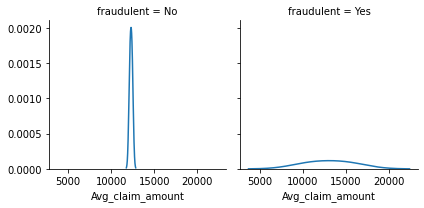

In [59]:
### QUes 15
df=comb_data.groupby(['Category','fraudulent']).agg(Avg_claim_amount=('claim_amount','mean')).reset_index()
print(df)
g = sns.FacetGrid(df, col="fraudulent")
g.map(sns.kdeplot, "Avg_claim_amount")

df=comb_data.groupby(['gender','fraudulent']).agg(Avg_claim_amount=('claim_amount','mean')).reset_index()
print(df)
g = sns.FacetGrid(df, col="fraudulent")
g.map(sns.kdeplot, "Avg_claim_amount")